In [1]:
import os
import warnings
import math
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from sklearn.metrics import mean_squared_error, mean_absolute_error
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split 
from sklearn import linear_model
from sklearn.metrics import recall_score, classification_report, precision_score, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, normalize
from scipy import ndimage
import seaborn as sns

In [2]:
data = pd.read_csv('sim_catalog')
data_train = data[:10000].drop(columns = ['stype','name_s'])
data_test = data[10000:].drop(columns = ['stype','name_s'])
data_train["habitable"] = data_train["habitable"].astype(int)
data_test["habitable"] = data_test["habitable"].astype(int)
data_train

,radius_p,p_orb,mass_p,ecc_p,inc_p,large_omega_p,small_omega_p,theta_p,albedo_bond,albedo_geom_vis,...,hz_in,hz_out,hz_center,habitable,snr_1h,baseline,detected,snr_current,int_time,t_slew
0,2.55899,1.21237,6.46922,0.0,0.36825,0.83082,4.28658,0.46104,0.07323,0.11134,...,0.745910,1.746354,1.246132,0,3.747645,21.852210,True,11.808785,35743.408285,0.0
1,1.62557,95.32925,2.94136,0.0,0.36825,4.71701,0.58424,3.76621,0.17084,0.46161,...,0.745910,1.746354,1.246132,0,2.570891,21.852210,True,8.100845,35743.408285,0.0
2,0.64641,413.44526,0.18259,0.0,0.36825,3.59078,0.90651,0.27668,0.54602,0.17279,...,0.745910,1.746354,1.246132,1,0.051327,21.852210,False,0.161731,35743.408285,0.0
3,1.45874,51.20469,5.36760,0.0,2.01016,2.62388,0.47298,2.25944,0.53153,0.47091,...,0.745910,1.746354,1.246132,0,8.482665,21.852210,True,26.728775,35743.408285,0.0
4,2.03712,98.57858,4.45356,0.0,2.01016,1.71757,2.04617,2.98199,0.32327,0.59087,...,0.745910,1.746354,1.246132,0,7.213424,21.852210,True,22.729412,35743.408285,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.61846,57.44866,0.14236,0.0,2.90408,5.42803,3.68573,1.92695,0.64542,0.09434,...,0.757573,1.769708,1.263641,0,1.034909,25.864007,False,0.000000,0.000000,-36000.0
9996,1.31919,162.09680,1.71530,0.0,1.94827,4.90003,5.63228,3.87834,0.47804,0.21161,...,0.757573,1.769708,1.263641,0,3.726342,25.864007,False,0.000000,0.000000,-36000.0
9997,2.86527,238.11522,12.30552,0.0,1.94827,6.07029,0.65380,1.73077,0.32779,0.01896,...,0.757573,1.769708,1.263641,0,12.948075,25.864007,False,0.000000,0.000000,-36000.0
9998,0.50299,374.37558,0.13657,0.0,1.94827,4.18341,0.80129,2.61918,0.13769,0.40184,...,0.757573,1.769708,1.263641,1,0.385875,25.864007,False,0.000000,0.000000,-36000.0


In [17]:
x_train = data_train.drop(["habitable"],axis=1)
y_train = data_train["habitable"]   
x_test = data_test.drop(["habitable"],axis=1)
y_test = data_test["habitable"]

x_train

,radius_p,p_orb,mass_p,ecc_p,inc_p,large_omega_p,small_omega_p,theta_p,albedo_bond,albedo_geom_vis,...,l_sun,hz_in,hz_out,hz_center,snr_1h,baseline,detected,snr_current,int_time,t_slew
0,2.55899,1.21237,6.46922,0.0,0.36825,0.83082,4.28658,0.46104,0.07323,0.11134,...,0.978398,0.745910,1.746354,1.246132,3.747645,21.852210,True,11.808785,35743.408285,0.0
1,1.62557,95.32925,2.94136,0.0,0.36825,4.71701,0.58424,3.76621,0.17084,0.46161,...,0.978398,0.745910,1.746354,1.246132,2.570891,21.852210,True,8.100845,35743.408285,0.0
2,0.64641,413.44526,0.18259,0.0,0.36825,3.59078,0.90651,0.27668,0.54602,0.17279,...,0.978398,0.745910,1.746354,1.246132,0.051327,21.852210,False,0.161731,35743.408285,0.0
3,1.45874,51.20469,5.36760,0.0,2.01016,2.62388,0.47298,2.25944,0.53153,0.47091,...,0.978398,0.745910,1.746354,1.246132,8.482665,21.852210,True,26.728775,35743.408285,0.0
4,2.03712,98.57858,4.45356,0.0,2.01016,1.71757,2.04617,2.98199,0.32327,0.59087,...,0.978398,0.745910,1.746354,1.246132,7.213424,21.852210,True,22.729412,35743.408285,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.61846,57.44866,0.14236,0.0,2.90408,5.42803,3.68573,1.92695,0.64542,0.09434,...,1.013059,0.757573,1.769708,1.263641,1.034909,25.864007,False,0.000000,0.000000,-36000.0
9996,1.31919,162.09680,1.71530,0.0,1.94827,4.90003,5.63228,3.87834,0.47804,0.21161,...,1.013059,0.757573,1.769708,1.263641,3.726342,25.864007,False,0.000000,0.000000,-36000.0
9997,2.86527,238.11522,12.30552,0.0,1.94827,6.07029,0.65380,1.73077,0.32779,0.01896,...,1.013059,0.757573,1.769708,1.263641,12.948075,25.864007,False,0.000000,0.000000,-36000.0
9998,0.50299,374.37558,0.13657,0.0,1.94827,4.18341,0.80129,2.61918,0.13769,0.40184,...,1.013059,0.757573,1.769708,1.263641,0.385875,25.864007,False,0.000000,0.000000,-36000.0


In [28]:
from sklearn.decomposition import PCA

# Set a fixed random state for reproducibility
random_state = 42  # You can choose any integer value

pca = PCA(random_state=random_state)
X_train = pca.fit_transform(x_train)
X_test = pca.transform(x_test)
total = sum(pca.explained_variance_)
k = 0
current_variance = 0
while current_variance / total < 0.99999:
    current_variance += pca.explained_variance_[k]
    k += 1
print(k)

7


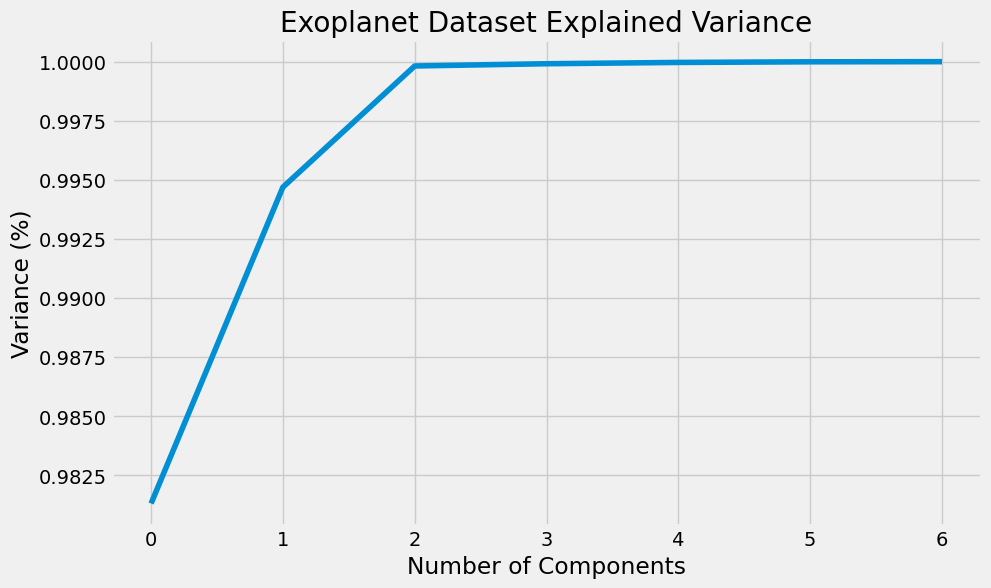

In [29]:
pca = PCA(n_components=k)
x_train_tr = pca.fit_transform(x_train)
x_test_tr = pca.transform(x_test)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Exoplanet Dataset Explained Variance')
plt.show()

Before OverSampling, counts of label '1': 1417
Before OverSampling, counts of label '0': 8583 



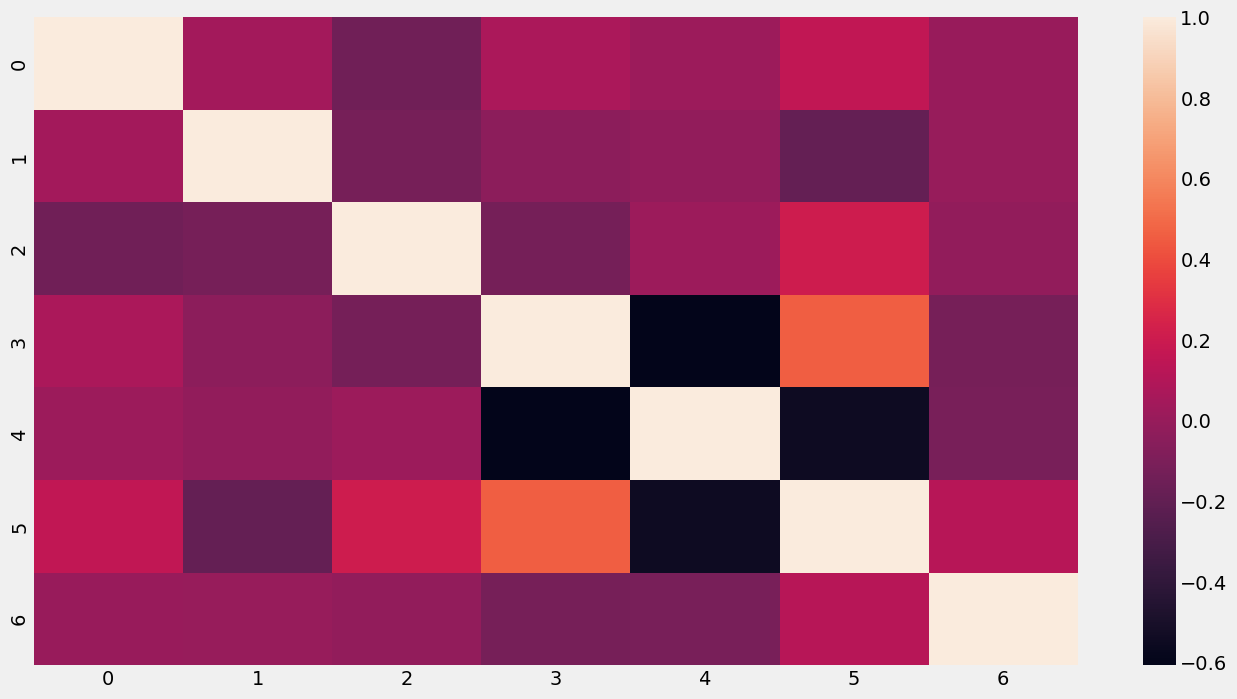

In [30]:
df = pd.DataFrame.from_records(x_train_tr)     
corr = df.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=False)
df.columns
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

In [31]:
sm = SMOTE(random_state=27)
x_train_res, y_train_res = sm.fit_resample(x_train_tr, y_train.ravel()) 

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

After OverSampling, counts of label '1': 8583
After OverSampling, counts of label '0': 8583


In [32]:
import tensorflow as tf
tf.random.set_seed(101)
from sklearn.model_selection import cross_val_score
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential # initialize neural network library
from keras.layers import Dense # build our layers library

In [33]:
def build_classifier():
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train_res.shape[1]))
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

classifier = KerasClassifier(build_fn = build_classifier, epochs = 40)
accuracies = cross_val_score(estimator = classifier, X = x_train_res, y = y_train_res, cv = 5, n_jobs = -1)
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))

Accuracy mean: 0.7644364893436432
Accuracy variance: 0.1734999064023517
